# <center> The Sparks Foundation 
## <center> Graduate Rotation Internship Program Nov'2020
### Author : Shah Yash
### Data Science and Business Analysis Internship
###  <center> Task 1 : To estimate marks of student based on hours studied 

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 1
%matplotlib inline
#just checking if this can publish to github

Autosaving every 1 seconds


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0'

#### Data Loading 

In [4]:
#importing the data from the given link
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
#printing first 2 rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#last five rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#getting all the inportant statistical information regarding the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data visaulisation and interpretation

Text(0, 0.5, 'Scores')

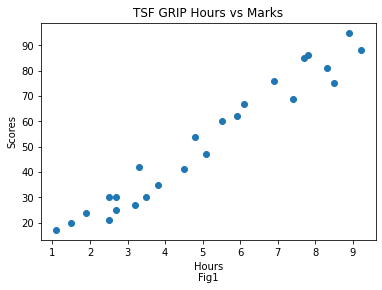

In [8]:
#plotting the data to see the relationship
plt.scatter(data["Hours"], data["Scores"])
plt.title("TSF GRIP Hours vs Marks")
plt.xlabel("Hours\nFig1")
plt.ylabel("Scores")

This cell is from interpreting the preliminary information that we get from the data. As we can see, the data is of 25 rows, with two columns, Hours and Scores. Hours describe the time that the student spent for preparation of the exam, and Scores list all the respective score. As we can see, there are no missing values


Also, on an average, student studies for 5 hours, and by studying 5 hours, the average score that he gets is 51.48. Thus, we obtain our preliminary relation that, Score ~= 10 * Hours. 

In [9]:
#printing whole data, just to confirm our hypothesis
#only possible because dataset is small
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


##### Preliminary hypothesis

By looking at the above data, our preliminary hypothesis seems to be working. Let us check the Root Mean Square error. 

In [10]:
#to check the scores, first we will have to generate the predictions, in this case, they are just all the hours
#multiplied by 10
y_prelim = data["Hours"] * 10 

In [11]:
y = data["Scores"]

In [12]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_prelim, y)))

5.571355310873647


Thus, the RMSE, of our preliminary hypothesis comes out to be 5.57. This is not very good, and we think that we can perform better than this. 

NOTE : In the above cell, I have calculated the RMSE for whole dataset. Below, for comparing with different ML models, we will just measure the RMSE with test data, for making it a fair comparison. 

##### ML modelling

As the data in pretty small, and doesn't contain any missing values, we don't have to do any type of data cleaning or manipulation. We can directly split the data into train test split, and then proceed to modelling the data. 

In [13]:
X, y = data["Hours"], data["Scores"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
X_train = pd.DataFrame(X_train)
X_train.shape
X_test = pd.DataFrame(X_test)
X_test.shape

(5, 1)

As we can already see from Fig 1, the relation between Hours and Scores is linear, so we can use Linear Regression, but we can also experiment with different regression algorithms, to check if they can do any better. 

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor

In [17]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

As we can see, we will be using Linear Regression, Lasso Regression, SGD Regressor, and Gradient Boosting technique, specifically, XGB Regressor (works very well with large data, but not with small data)

In [16]:
linear = LinearRegression()
lasso = Lasso()
sgd = SGDRegressor()
xgb = XGBRegressor()

In [17]:
linear.fit(X_train, y_train)
lasso.fit(X_train, y_train)
sgd.fit(X_train, y_train)
xgb.fit(X_train, y_train)

[11:43:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
y_linear = linear.predict(X_test)
y_lasso = lasso.predict(X_test)
y_sgd = sgd.predict(X_test)
y_xgb = xgb.predict(X_test)
y_hypo = X_test * 10

In [19]:
cols = [["Hypothesis", math.sqrt(mean_squared_error(y_hypo, y_test))],
       ["Linear Regression", math.sqrt(mean_squared_error(y_linear, y_test))],
       ["SGD Regression", math.sqrt(mean_squared_error(y_sgd, y_test))],
       ["Lasso Regression", math.sqrt(mean_squared_error(y_lasso, y_test))],
       ["XGB Regressor", math.sqrt(mean_squared_error(y_xgb, y_test))]]
rows = ["Model", "RMSE Score"]
final_output = pd.DataFrame(data = cols, columns=rows)

In [20]:
final_output

,Model,RMSE Score
0,Hypothesis,3.286335
1,Linear Regression,5.080324
2,SGD Regression,4.514898
3,Lasso Regression,5.169691
4,XGB Regressor,6.055755


As we can see, according to the RMSE Score, SGD regressor performs the best. Thus, having no time constraints mentioned, we will be using SGD Regressor from here on. 

In [21]:
sgd.predict([[9.5]])

array([96.57136234])

Text(0, 0.5, 'Scores')

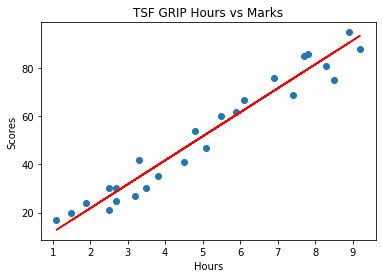

In [22]:
plt.scatter(data["Hours"], data["Scores"])
plt.plot(X_train, sgd.predict(X_train), c = "red")
plt.title("TSF GRIP Hours vs Marks")
plt.xlabel("Hours")
plt.ylabel("Scores")

### <center> Thank you very much